## This is a sample jupyter notebook to generate the prediction for tournament submission
#### For detail documentation, please visit https://rocket-capital-investment.gitbook.io/rci-tournament/
#### You may also use Google Colab to run this notebook: https://colab.research.google.com/github/rocketcapital-ai/competition_quickstart_dataloader/blob/main/Quickstart.ipynb

### Loading train, test, validation data

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

train_dataset  = pd.read_csv('dataset/train_dataset.csv', index_col = 'date')
validation_dataset  = pd.read_csv('dataset/validation_dataset.csv', index_col = 'date')


In [2]:
# first column (symbol) is the ticker
# 'target_DC1' is the log of return for delta between current close to previous close
# 'target' is the y which is ranked by Era using 'target_DC1'
# the rest of the columns are features to be used for ML
train_dataset.head()

,symbol,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_2003,feature_2004,feature_2005,feature_2006,feature_2007,feature_2008,feature_2009,feature_DC1,target,target_DC1
date,,,,,,,,,,,,,,,,,,,,,
2018-04-29,BTC,0.000000,0.000000,0.965517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.862069,0.689655,0.655172,0.655172,0.724138,0.827586,0.827586,0.931034,0.758621,0.024718
2018-04-29,DLT,0.310345,0.310345,0.137931,0.275862,0.206897,0.517241,0.344828,0.689655,0.551724,...,0.137931,0.206897,0.206897,0.379310,0.172414,0.241379,0.379310,0.241379,0.517241,-0.005240
2018-04-29,ENJ,0.241379,0.068966,0.310345,0.344828,0.103448,0.103448,0.379310,0.206897,0.103448,...,0.517241,0.379310,0.344828,0.310345,0.482759,0.655172,0.448276,0.724138,0.413793,-0.036471
2018-04-29,OMG,0.758621,0.965517,0.896552,0.965517,0.965517,0.965517,0.068966,0.275862,0.862069,...,0.758621,0.896552,0.931034,0.896552,0.931034,0.896552,0.896552,0.827586,0.275862,-0.066945
2018-04-29,UFR,0.620690,0.413793,0.275862,0.413793,0.517241,0.362069,0.758621,0.586207,0.758621,...,0.068966,0.482759,0.275862,0.172414,0.551724,0.103448,0.103448,0.137931,0.724138,0.020286


In [3]:
# validation_dataset is the latest data from most recent Era
# it has the same structure as the dataset, however 'target' and 'target_DC1' are NaN
# contributor should only predict the 'target' only
# note that the 'target_DC1' will be only used for verification and to reconstruct the 'target' whenever needed
validation_dataset.head()

,symbol,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_2003,feature_2004,feature_2005,feature_2006,feature_2007,feature_2008,feature_2009,feature_DC1,target,target_DC1
date,,,,,,,,,,,,,,,,,,,,,
2022-03-27,BTC,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.868132,0.810047,0.863422,0.885400,0.839874,0.888540,0.891680,0.866562,NaN,NaN
2022-03-27,TRST,0.727630,0.752747,0.755887,0.755887,0.733124,0.748038,0.740973,0.769231,0.765306,...,0.178964,0.200942,0.287284,0.307692,0.251177,0.259027,0.281005,0.229199,NaN,NaN
2022-03-27,SRN,0.727630,0.673469,0.492151,0.755887,0.620094,0.748038,0.740973,0.769231,0.765306,...,0.164835,0.204082,0.273155,0.298273,0.211931,0.208791,0.235479,0.164835,NaN,NaN
2022-03-27,SALT,0.311617,0.824176,0.827316,0.795133,0.742543,0.781790,0.766091,0.823391,0.816327,...,0.522763,0.456829,0.453689,0.467818,0.412873,0.547881,0.563579,0.514914,NaN,NaN
2022-03-27,REQ,0.829670,0.803768,0.850863,0.129513,0.308477,0.105965,0.102041,0.299843,0.120094,...,0.635793,0.759812,0.828885,0.844584,0.789639,0.720565,0.750392,0.678179,NaN,NaN


### Create X and y from dataset

In [4]:
# X is all the columns except the 'symbol', 'target', 'target_DC1'
X = train_dataset.iloc[:, 1:-2]

# y is just the target
y = train_dataset.target

In [5]:
X

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_2001,feature_2002,feature_2003,feature_2004,feature_2005,feature_2006,feature_2007,feature_2008,feature_2009,feature_DC1
date,,,,,,,,,,,,,,,,,,,,,
2018-04-29,0.000000,0.000000,0.965517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.758621,0.793103,0.862069,0.689655,0.655172,0.655172,0.724138,0.827586,0.827586,0.931034
2018-04-29,0.310345,0.310345,0.137931,0.275862,0.206897,0.517241,0.344828,0.689655,0.551724,0.689655,...,0.172414,0.241379,0.137931,0.206897,0.206897,0.379310,0.172414,0.241379,0.379310,0.241379
2018-04-29,0.241379,0.068966,0.310345,0.344828,0.103448,0.103448,0.379310,0.206897,0.103448,0.310345,...,0.413793,0.344828,0.517241,0.379310,0.344828,0.310345,0.482759,0.655172,0.448276,0.724138
2018-04-29,0.758621,0.965517,0.896552,0.965517,0.965517,0.965517,0.068966,0.275862,0.862069,0.482759,...,0.827586,0.827586,0.758621,0.896552,0.931034,0.896552,0.931034,0.896552,0.896552,0.827586
2018-04-29,0.620690,0.413793,0.275862,0.413793,0.517241,0.362069,0.758621,0.586207,0.758621,0.551724,...,0.034483,0.034483,0.068966,0.482759,0.275862,0.172414,0.551724,0.103448,0.103448,0.137931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-20,0.518717,0.512478,0.516934,0.500891,0.506239,0.501783,0.554367,0.557932,0.581105,0.616756,...,0.673797,0.631016,0.696970,0.878788,0.830660,0.811052,0.857398,0.538324,0.500891,0.552585
2022-03-20,0.783422,0.691622,0.771836,0.753119,0.639037,0.342246,0.737968,0.385027,0.811943,0.778075,...,0.877005,0.889483,0.825312,0.773619,0.837790,0.848485,0.771836,0.885918,0.900178,0.852050
2022-03-20,0.379679,0.691622,0.706774,0.678253,0.686275,0.677362,0.737968,0.724599,0.581105,0.778075,...,0.821747,0.821747,0.775401,0.663102,0.705882,0.721925,0.654189,0.843137,0.841355,0.803922


In [6]:
y

date
2018-04-29    0.758621
2018-04-29    0.517241
2018-04-29    0.413793
2018-04-29    0.275862
2018-04-29    0.724138
                ...   
2022-03-20    0.967914
2022-03-20    0.386809
2022-03-20    0.219251
2022-03-20    0.737968
2022-03-20    0.349376
Name: target, Length: 72976, dtype: float64

### Each era representing a set of cryptocurrency assets for the time period, the number of assets within each Era is different

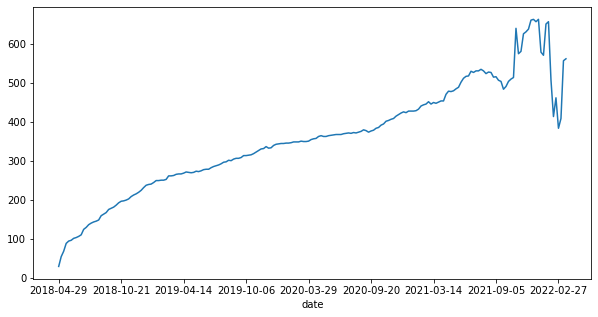

In [7]:
X.groupby(X.index).count().iloc[:,0].plot(figsize = (10,5));

### Split X, y into train and test

In [8]:
train = 0.9
test = 0.1
era = len(X.index.unique())
train_era = int(era * train)
test_era = era - train_era
print('total Era: {}'.format(era))
print('train Era: {}'.format(train_era))
print('test Era: {}'.format(test_era))


total Era: 204
train Era: 183
test Era: 21


In [9]:
#split train and test set according to the train_era and test_era
X_train = X[X.index < X.index.unique()[train_era]]
y_train = y[y.index < y.index.unique()[train_era]]
X_test = X[X.index >= X.index.unique()[train_era]]
y_test = y[y.index >= y.index.unique()[train_era]]
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))


X_train shape: (60887, 2010)
X_test shape: (12089, 2010)


### Use simple Linear Regression to train a model and check the rmse

In [10]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(n_jobs=-1).fit(X_train, y_train)

In [11]:
# function to calculate Spearman correlation by era (mean, std, max, min)
# we want to maximize but maintain stable correlation across era to maximize both challenge and competition reward
def spearman_by_era(prediction, target):
  df = pd.DataFrame(index=target.index,
                    data = {'prediction': prediction,
                            'target': target}
                    )
  
  spearman_era_list = []
  for era in df.index.unique():
    era_df = df[df.index == era]
    spearman_corr = sp.stats.spearmanr(era_df.prediction, era_df.target)[0]
    spearman_era_list.append(spearman_corr)

  mean = np.mean(spearman_era_list)
  std = np.std(spearman_era_list)
  max = np.max(spearman_era_list)
  min = np.min(spearman_era_list)
  return mean, std, max, min
  
y_pred_train = reg.predict(X_train)
train_spearman = spearman_by_era(y_pred_train, y_train)
print('Train dataset Spearman correlation: mean = {} ; std = {} ; max = {} ; min = {}'.format(round(train_spearman[0], 4), 
                                                                                            round(train_spearman[1], 4),
                                                                                            round(train_spearman[2], 4),
                                                                                            round(train_spearman[3], 4),
                                                                                            ))

y_pred_test = reg.predict(X_test)
test_spearman = spearman_by_era(y_pred_test, y_test)
print('Test dataset Spearman correlation: mean = {} ; std = {} ; max = {} ; min = {}'.format(round(test_spearman[0], 4),
                                                                                            round(test_spearman[1], 4),
                                                                                            round(test_spearman[2], 4),
                                                                                            round(test_spearman[3], 4),
                                                                                            ))


Train dataset Spearman correlation: mean = 0.2359 ; std = 0.0695 ; max = 0.3877 ; min = 0.0309
Test dataset Spearman correlation: mean = 0.0676 ; std = 0.0536 ; max = 0.168 ; min = -0.0424


In [12]:
# Use the trained Linear Regression model to make prediction on latest data

X_validation = validation_dataset.iloc[:, 1:-2]
y_validation_linear_reg = reg.predict(X_validation)

y_validation_linear_reg[:5]

array([0.91330237, 0.53930163, 0.51081772, 0.51021452, 0.46884493])

### Let's use the prediction from linear regression to join with validation dataset symbol for submission

In [14]:
prediction = pd.DataFrame()
prediction['symbol'] = list(validation_dataset.symbol)
prediction['prediction'] = y_validation_linear_reg

# sort the prediction to check which symbol is weaker and stronger, ie. FOX is weakest; BTC is strongest
prediction.sort_values('prediction')

,symbol,prediction
528,FOX,0.210465
119,WINGS,0.243552
95,CNN,0.257930
261,XRT,0.260690
573,RACA,0.265829
...,...,...
137,IXT,0.694248
279,UNI,0.706441
297,APY,0.714196
608,DFA,0.722572


### Check is prediction in accordance for submission format (using the prediction from linear regression)

In [15]:
#check if y_latest is in accordance to shape for submission
if set(prediction.symbol) == set(validation_dataset.symbol):
    print('symbol matched!')
else:
    print('symbol unmatched, the symbol in prediction df must match the symbol in validation_dataset...')
    
if prediction.shape[1] == 2:
    print('column counts ok!')
else:
    print('It should have 2 columns, first column with symbol, second with prediction...')


symbol matched!
column counts ok!


### Output prediction as a .csv file for submission!

In [16]:
#Output submission as .csv file
prediction.to_csv('prediction/prediction.csv', index = False, header = None)